<a href="https://colab.research.google.com/github/yishairasowsky/Sefaria-Project/blob/master/topic_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd

In [0]:
prayer_df = pd.read_csv('/content/prayer-sources.csv', 
                        # encoding="latin-1"
                        )
not_prayer_df = pd.read_csv('/content/not-prayer-sources.csv', 
# not_prayer_df = pd.read_csv('/content/not-prayer-sources-more.csv', 
                            # encoding="latin-1"
                            )

In [9]:
prayer_df.sample(3)

,Ref,En,He
172,"Midrash Aggadah, Exodus 23:1:3",NaN,"ד""א לא תשא שמע שוא. מכאן למתפלל שצריך כוונה, ו..."
332,"Shem MiShmuel, Chayei Sara 3:8",NaN,ונראה דהנה כל תחינות ובקשות ותפילות שאדם עורך ...
999,Shabbat 30b:5,"Similarly, “ So I commended mirth,” that is th...",״וְשִׁבַּחְתִּי אֲנִי אֶת הַשִּׂמְחָה״ — שִׂמְ...


In [10]:
prayer_df['is_prayer'] = 'yes'
prayer_df = prayer_df[['En','is_prayer']]

prayer_df.tail(3)

,En,is_prayer
1049,"It is true that you are the one who judges, an...",yes
1050,In these Berachot (blessings) we bow down: the...,yes
1051,On seeds he says [the Beracha (blessing)] Bore...,yes


In [11]:
not_prayer_df.sample(3)

,Ref,En,He,Topics
992,Shabbat 86a:4,The Gemara elaborates on the matter of a woman...,תנו רבנן פולטת שכבת זרע ביום השלישי טהורה דברי...,niddah|laws-of-the-main-categories-of-impurity
120,Bava Metzia 60b:2,The mishna teaches: And one may not sift groun...,ולא יבור את הגריסין דברי אבא שאול וחכמים מתירי...,laws-of-cancellation-of-a-transaction-and-the-...
890,Deuteronomy 8:14,"then thy heart be lifted up, and thou forget t...",וְרָ֖ם לְבָבֶ֑ךָ וְשָֽׁכַחְתָּ֙ אֶת־יְהוָ֣ה אֱ...,life|parashat-eikev|thanksgiving|gratitude|com...


In [12]:
not_prayer_df['is_prayer'] = 'no'
not_prayer_df = not_prayer_df[['En','is_prayer']]
not_prayer_df.sample(3)

,En,is_prayer
389,The baraita continues: The punishment for a no...,no
1022,NaN,no
215,NaN,no


In [13]:
all_prayer_frames = [prayer_df, not_prayer_df]
all_prayer_df = pd.concat(all_prayer_frames)
all_prayer_df.reset_index(inplace=True)
# all_prayer_df.style.set_properties({'align': 'right'})

# all_prayer_df.tail(3)
all_prayer_df.sample(5)
# all_prayer_df.loc[[345]]

,index,En,is_prayer
1621,569,NaN,no
1611,559,"What is the source for the third case, one who...",no
879,879,"And Jacob said: ‘O God of my father Abraham, a...",yes
187,187,"But sanctify yourselves, and be holy in your b...",yes
1694,642,"Alternatively, in any case where if the phylac...",no


In [14]:
print("Before dropping duplicates",all_prayer_df.shape)
all_prayer_df.drop_duplicates(inplace=True)
print("After dropping duplicates",all_prayer_df.shape)
print("Nulls before dropping:",all_prayer_df.isnull().sum()[0])
all_prayer_df.dropna(inplace=True)
print("Nulls after dropping:",all_prayer_df.isnull().sum()[0])
# all_prayer_df.isnull().sum()
# all_prayer_df.sample(5)

Before dropping duplicates (2103, 3)
After dropping duplicates (2103, 3)
Nulls before dropping: 0
Nulls after dropping: 0


In [15]:
del all_prayer_df['index']
all_prayer_df.sample(3)

,En,is_prayer
1430,This happens in two manners. One possibility i...,no
2041,And it is with regard to the issue that is the...,no
973,And why did the Rabbis say that the additional...,yes


In [16]:
shape = all_prayer_df.shape
print(f"{shape[0]} rows and {shape[1]} columns")

1247 rows and 2 columns


In [17]:
all_prayer_df['is_prayer'] = all_prayer_df['is_prayer'].map({'no': 0, 'yes': 1})
all_prayer_df.sample(5)

,En,is_prayer
1933,§ The mishna taught: In the case of a woman wh...,0
941,The sacrifice is slaughtered for the sake of s...,1
1921,Consequently they to whom he was sent are the ...,0
1237,"ואברהם היה יהיה....כי ידעתיו, “seeing that Avr...",0
4,What is the meaning of that which is written: ...,1


In [18]:
print('Prayer:', (all_prayer_df.is_prayer.values == 1).sum())
print('Not prayer:', (all_prayer_df.is_prayer.values == 0).sum())

Prayer: 579
Not prayer: 668


In [21]:
import nltk
nltk.download('stopwords')

import string

from nltk.corpus import stopwords

whitelist = set('abcdefghijklmnopqrstuvwxyz ZXCVBNMASDFGHJKLQWERTYUIOP')

def process_text(text):
    '''
    1. Keep only letters and spaces
    2. Remove stopwords
    3. Return str of clean text words
    '''
    #1
    chars_str = ''.join(filter(whitelist.__contains__, text))
    #2
    clean_words = [word.lower() for word in chars_str.split() if word.lower() not in stopwords.words('english')]
    #3
    return ' '.join(clean_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
sample_text = '''aBC.!@#$%^&    c*(בחתו ‎‎‎ או‎ בקרחתו — une...
233 the gns: ac ...
1041    7. a pien p'''
process_text(sample_text)

'abc c une gns ac pien p'

In [23]:
# all_prayer_df['En'].head().apply(process_text)
all_prayer_df['En'] = all_prayer_df['En'].apply(process_text)
all_prayer_df.head()
# all_prayer_df.loc[[345]]


,En,is_prayer
0,another abba binyamins statements regard laws ...,1
1,taught baraita abba binyamin said ones prayer ...,1
2,additionally ravin bar rav adda said rabbi yit...,1
3,similarly taught baraita rabbi yishmael ben el...,1
4,meaning written let prayer unto lord time favo...,1


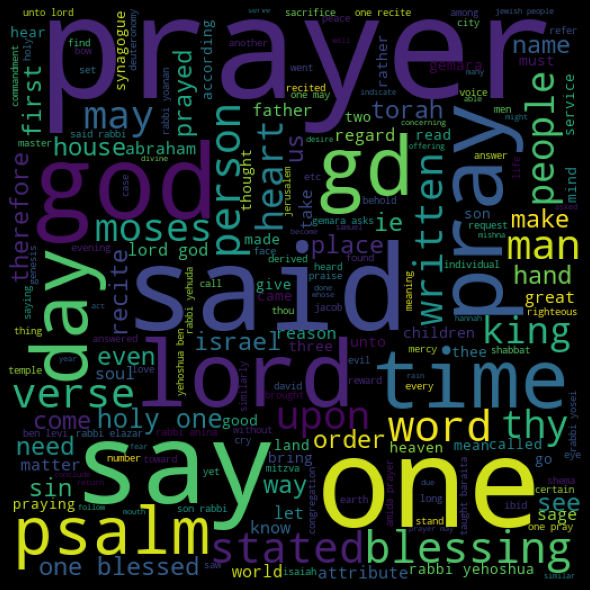

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

prayer_words = ' '.join(list(all_prayer_df[all_prayer_df['is_prayer'] == 1]['En']))
prayer_wc = WordCloud(width = 512,height = 512).generate(prayer_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(prayer_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

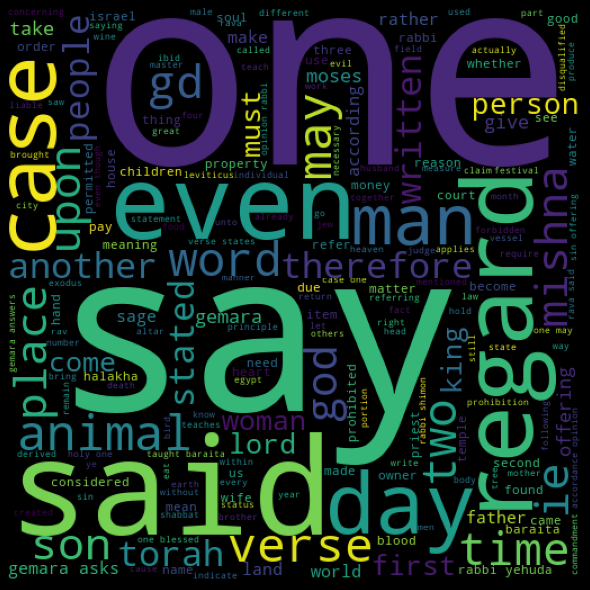

In [25]:
not_prayer_words = ' '.join(list(all_prayer_df[all_prayer_df['is_prayer'] == 0]['En']))
not_prayer_wc = WordCloud(width = 512,height = 512).generate(not_prayer_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(not_prayer_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [26]:
X = all_prayer_df.En
y = all_prayer_df.is_prayer
print(f"Totals: {X.shape} / {y.shape}")

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(f"\nTrain: {X_train.shape} / {y_train.shape}")

print(f"\nTest: {X_test.shape} / {y_test.shape}")

Totals: (1247,) / (1247,)

Train: (935,) / (935,)

Test: (312,) / (312,)


In [0]:
# Convert a collection of text documents to a matrix of token counts

from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer

# vectorizer = CountVectorizer(analyzer=process_text)
# vectorizer = CountVectorizer(ngram_range=(2, 4))
# vectorizer = HashingVectorizer(ngram_range=(2, 4),alternate_sign=False)
vectorizer = TfidfVectorizer(ngram_range=(2, 4))
# vectorizer.fit(X_train)

In [28]:
print("Shape of document term matrix")

# X_train_dtm = vectorizer.transform(X_train)
X_train_dtm = vectorizer.fit_transform(X_train)
print(f"Train: {X_train_dtm.shape}")

# prayer_bag_of_words = vectorizer.fit_transform(all_prayer_df['En'])
X_test_dtm = vectorizer.transform(X_test)
print(f"Test: {X_test_dtm.shape}")

Shape of document term matrix
Train: (935, 168960)
Test: (312, 168960)


In [29]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB, ComplementNB

classifier = MultinomialNB()
# classifier = ComplementNB()

# for Gaussian need array format
# X_train = X_train.toarray()
# X_test = X_test.toarray()
# classifier = GaussianNB()
# classifier = BernoulliNB()

%time classifier.fit(X_train_dtm, y_train)
y_pred_class = classifier.predict(X_test_dtm)
from sklearn import metrics
print('\nAccuracy:',metrics.accuracy_score(y_test, y_pred_class))
print("\nHow many prayer (1) and non prayer (0)?")
print(y_test.value_counts())
null_accuracy = y_test.value_counts().head(1) / len(y_test)
print('\nNull accuracy:', null_accuracy)

negs = y_test.value_counts()[0]
poss = y_test.value_counts()[1]
print('Manual null accuracy:',(1 / (1 + negs/poss)))

print("\nConfusion Matrix:")
metrics.confusion_matrix(y_test, y_pred_class)

CPU times: user 13.9 ms, sys: 0 ns, total: 13.9 ms
Wall time: 13.9 ms

Accuracy: 0.8108974358974359

How many prayer (1) and non prayer (0)?
0    159
1    153
Name: is_prayer, dtype: int64

Null accuracy: 0    0.509615
Name: is_prayer, dtype: float64
Manual null accuracy: 0.4903846153846154

Confusion Matrix:


array([[137,  22],
       [ 37, 116]])

In [31]:
TP = X_test[y_pred_class + y_test == 2]
TN = X_test[y_pred_class + y_test == 0]
FP = X_test[y_pred_class > y_test]
FN = X_test[y_pred_class < y_test]

pd.options.display.max_colwidth = 100

# pd.style.set_properties(**{'text-align': 'left'})

# print("\n*** TP ***")
# print(TP.sample(5))
# print("\n*** TN ***")
# print(TN.sample(5))
print("\n*** FP ***")
print(FP.sample(10))
print("\n*** FN ***")
print(FN.sample(10))


*** FP ***
1708    rabbi ama bar anina says holy one blessed fashioned ten canopies adam first man garden eden stat...
1408    name rav rabbi yehuda said future holy one blessed rejoice righteous let shechinah dwell among e...
1139                                                           trust ye lord ever lord god everlasting rock
1768    truth wise man understands awesome truth heart stirred tremble man therefore give heart take hee...
1367    fall angels nd adam lived hundred thirty years begat likeness image gen hence thou mayest learn ...
1146    states mishna us greater burial joseph none moses involved transporting coffin sages taught tose...
1398                                         sacrifice wicked abomination much bringeth proceeds wickedness
1338    make argument exempts entire world judgment day temple destroyed stated therefore hear afflicted...
1219    song recite praise lord earth sea monsters depthsfruit trees cedarspraise lord psalms angel resp...
1584    numb con

In [0]:
# FP.to_csv('FP', sep='\t', encoding='utf-8')
# FN.to_csv('FN', sep='\t', encoding='utf-8')
